<a href="https://www.kaggle.com/jy2040/tabular-data-model-fitting?scriptVersionId=88835328" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Objecive

The goal is to create model(s) to predict building energy consumption. The dataset consists of building characteristics and climate and weather variables for the regions in which the buildings are located. Accurate predictions of energy consumption can help policymakers target retrofitting efforts to maximize emissions reductions. The dataset was created in collaboration with Climate Change AI (CCAI) and Lawrence Berkeley National Laboratory (Berkeley Lab)

## Data Description
The dataset consists of building characteristics (e.g. floor area, facility type etc), weather data for the location of the building (e.g. annual average temperature, annual total precipitation etc) as well as the energy usage for the building and the given year, measured as Site Energy Usage Intensity (Site EUI). Each row in the data corresponds to the a single building observed in a given year. 

The eventual objective is to predict the Site EUI for each row as a function of the building features and the weather data for the location of the building. Your task for this asignment is to <b>perform data processing, EDA and necessary feature transformation<b> that would set you up for prediction.


## Data Dictionary

**id**: building id

**Year_Factor**: anonymized year in which the weather and energy usage factors were observed

**State_Factor**: anonymized state in which the building is located

**building_class**: building classification

**facility_type**: building usage type

**floor_area**: floor area (in square feet) of the building

**year_built**: year in which the building was constructed

**energy_star_rating**: the energy star rating of the building

**ELEVATION**: elevation of the building location

**january_min_temp**: minimum temperature in January (in Fahrenheit) at the location of the building

**january_avg_temp**: average temperature in January (in Fahrenheit) at the location of the building

**january_max_temp**: maximum temperature in January (in Fahrenheit) at the location of the building

**cooling_degree_days**: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**heating_degree_days**: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

**precipitation_inches**: annual precipitation in inches at the location of the building

**snowfall_inches**: annual snowfall in inches at the location of the building

**snowdepth_inches**: annual snow depth in inches at the location of the building

**avg_temp**: average temperature over a year at the location of the building

**days_below_30F**: total number of days below 30 degrees Fahrenheit at the location of the building

**days_below_20F**: total number of days below 20 degrees Fahrenheit at the location of the building

**days_below_10F**: total number of days below 10 degrees Fahrenheit at the location of the building

**days_below_0F**: total number of days below 0 degrees Fahrenheit at the location of the building

**days_above_80F**: total number of days above 80 degrees Fahrenheit at the location of the building

**days_above_90F**: total number of days above 90 degrees Fahrenheit at the location of the building

**days_above_100F**: total number of days above 100 degrees Fahrenheit at the location of the building

**days_above_110F**: total number of days above 110 degrees Fahrenheit at the location of the building

**direction_max_wind_speed**: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**direction_peak_wind_speed**: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

**max_wind_speed**: maximum wind speed at the location of the building

**days_with_fog**: number of days with fog at the location of the building

#### Target
**site_eui**: Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills

Source: WiDS Datathon 2022

In [1]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
'''Libraries which will be used in this notebook'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

'Libraries which will be used in this notebook'

## Understanding Data (Review)

* Understand distributions
* Trends
* Relationships
* Patterns

In [3]:
'''Reading training and test data'''
train_data = pd.read_csv('../input/widsdatathon2022/train.csv')
test_data = pd.read_csv('../input/widsdatathon2022/test.csv')
print("Training dataset dimentions:",train_data.shape)
print("Test dataset dimentions:",test_data.shape)

'Reading training and test data'

Training dataset dimentions: (75757, 64)
Test dataset dimentions: (9705, 63)


### 1. Distribution of the data

In [4]:
#to desplay all the rows(which columns of out main data)
pd.set_option('display.max_rows', train_data.shape[1]+1)
pd.set_option('display.max_columns', train_data.shape[1]+1)

In [5]:
train_data.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [6]:
len(train_data.year_built.unique())

181

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [8]:
train_data.describe()
'''
Months with lowest average temperature: Jan & Feb -> This is expected since these are the cooler winter months
Months with highest average temperature: Jul & Aug -> This is expected since these are the hotter summer months
'''

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978

'\nMonths with lowest average temperature: Jan & Feb -> This is expected since these are the cooler winter months\nMonths with highest average temperature: Jul & Aug -> This is expected since these are the hotter summer months\n'

In [9]:
# removing id variable for now
train_data.drop(['id'],inplace = True,axis = 1)

'1. Is there any missing values in the traing as well as test dataset?'

,Null Values,Percentage of Missing Values
year_built,1837,2.424858
energy_star_rating,26709,35.256148
direction_max_wind_speed,41082,54.228652
direction_peak_wind_speed,41811,55.190939
max_wind_speed,41082,54.228652
days_with_fog,45796,60.451179


<Figure size 1080x504 with 0 Axes>

<AxesSubplot:>

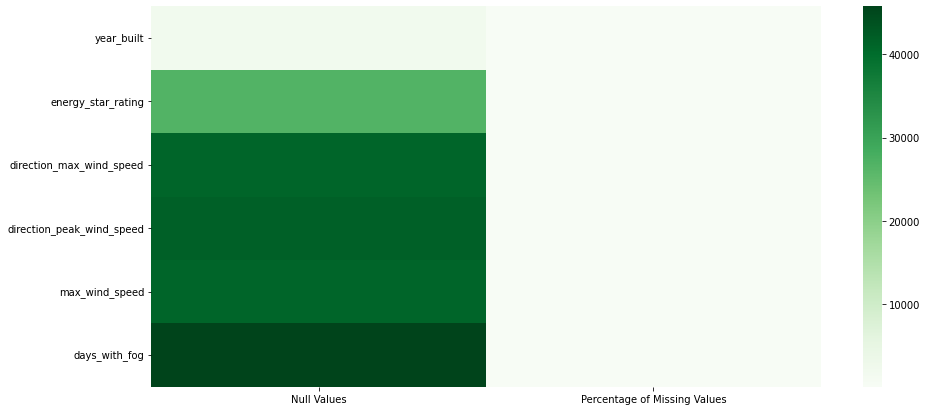

In [10]:
'''1. Is there any missing values in the traing as well as test dataset?'''
from IPython.display import display
missing_df = pd.DataFrame({"Null Values" : train_data.isna().sum() , "Percentage of Missing Values" : (train_data.isna().mean())*100}).loc[train_data.isna().sum().ne(0)]
display(missing_df)
plt.figure(figsize = (15,7))
sns.heatmap(missing_df,cmap = "Greens")

'Analysing the distribution of the target variable'

<Figure size 1008x432 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='site_eui', ylabel='Count'>

<AxesSubplot:>

<AxesSubplot:>

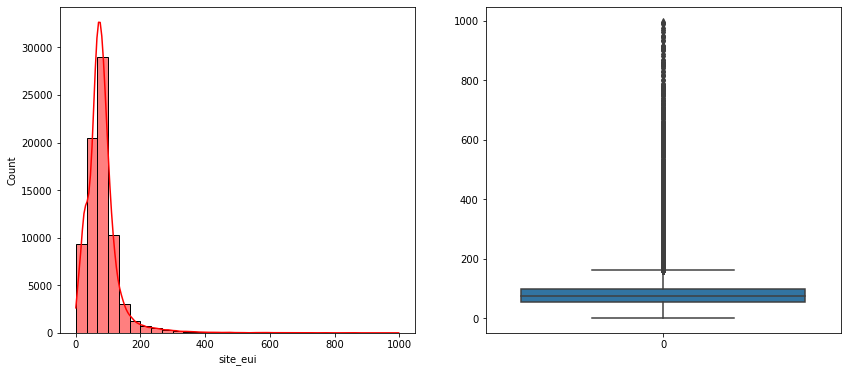

In [11]:
'''Analysing the distribution of the target variable'''
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.histplot(data=train_data, x="site_eui", color = 'red', kde=True,bins=30)
plt.subplot(122)
sns.boxplot(data = train_data.site_eui)

# Target variable has the right skewed distribution
# deviation and outliers in the righ

In [12]:
'''Categorical Variable distribution'''
# numeric_data = data.select_dtypes(include=[np.number])
categorical_data = train_data.select_dtypes(exclude=[np.number])
categorical_data.head()
print("Number of Unique values in State_Fator : ",len(categorical_data.State_Factor.unique()))
print("Number of Unique values in building_class : ",len(categorical_data.building_class.unique()))
print("Number of Unique values in facility_type : ",len(categorical_data.facility_type.unique()))
print(categorical_data.State_Factor.unique())

'Categorical Variable distribution'

,State_Factor,building_class,facility_type
0,State_1,Commercial,Grocery_store_or_food_market
1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center
2,State_1,Commercial,Retail_Enclosed_mall
3,State_1,Commercial,Education_Other_classroom
4,State_1,Commercial,Warehouse_Nonrefrigerated


Number of Unique values in State_Fator :  7
Number of Unique values in building_class :  2
Number of Unique values in facility_type :  60
['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']


In [13]:
'''Categorical Variable distribution'''
# numeric_data = data.select_dtypes(include=[np.number])
test_categorical_data = test_data.select_dtypes(exclude=[np.number])
test_categorical_data.head()
print("Number of Unique values in State_Fator : ",len(test_categorical_data.State_Factor.unique()))
print("Number of Unique values in building_class : ",len(test_categorical_data.building_class.unique()))
print("Number of Unique values in facility_type : ",len(test_categorical_data.facility_type.unique()))

'Categorical Variable distribution'

,State_Factor,building_class,facility_type
0,State_1,Commercial,Grocery_store_or_food_market
1,State_1,Commercial,Grocery_store_or_food_market
2,State_1,Commercial,Grocery_store_or_food_market
3,State_1,Commercial,Grocery_store_or_food_market
4,State_1,Commercial,Grocery_store_or_food_market


Number of Unique values in State_Fator :  6
Number of Unique values in building_class :  2
Number of Unique values in facility_type :  60


,State_Factor,Frequency
0,State_6,50840
1,State_11,6412
2,State_1,5618
3,State_2,4871
4,State_4,4300
5,State_8,3701
6,State_10,15


<Figure size 720x288 with 0 Axes>

<BarContainer object of 7 artists>

Text(0.5, 1.0, 'State Factor')

Text(0.5, 0, 'Frequency')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

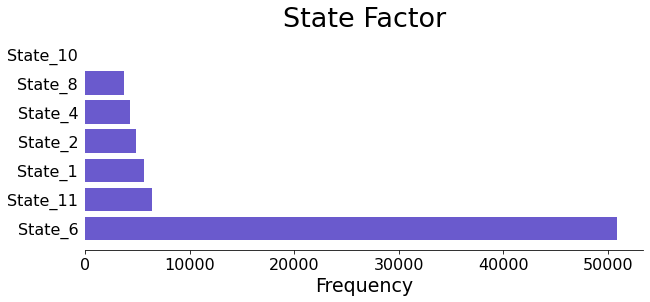

"\nState_Factor : This variable is unbalanced, 'State_6' occures most of the times while other values are less frequenct comparing to 'State_6'\n"

In [14]:
state_fact_freq = pd.DataFrame(categorical_data.State_Factor.value_counts(dropna=False))
state_fact_freq.reset_index(inplace=True)
state_fact_freq.rename(columns= {'index' : 'State_Factor' , 'State_Factor' : 'Frequency'} , inplace=True)
display(state_fact_freq)
plt.figure(figsize=(10,4))
plt.barh(state_fact_freq.State_Factor, state_fact_freq.Frequency, color='slateblue')
plt.title('State Factor', fontsize=27)
plt.xlabel('Frequency', fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(left=False)
sns.despine(left=True)
plt.show()

'''
State_Factor : This variable is unbalanced, 'State_6' occures most of the times while other values are less frequenct comparing to 'State_6'
'''

,building_class,Frequency
0,Residential,43558
1,Commercial,32199


<Figure size 720x288 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Building Class')

Text(0.5, 0, 'Frequency')

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

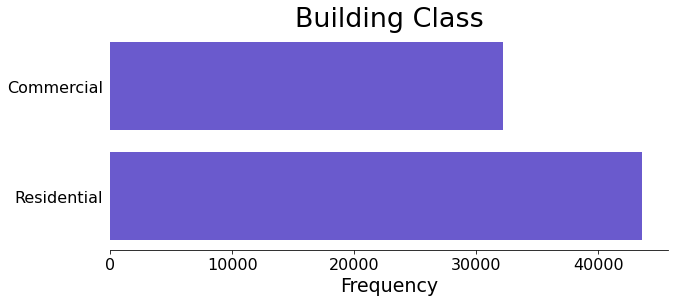

'\nbuilding_class : distribution of this variable is somewhat acceptable as frequencies of both building types are almost same\n'

In [15]:
build_freq = pd.DataFrame(categorical_data.building_class.value_counts(dropna=False))
build_freq.reset_index(inplace=True)
build_freq.rename(columns= {'index' : 'building_class' , 'building_class' : 'Frequency'} , inplace=True)
display(build_freq)
plt.figure(figsize=(10,4))
plt.barh(build_freq.building_class, build_freq.Frequency, color='slateblue')
plt.title('Building Class', fontsize=27)
plt.xlabel('Frequency', fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(left=False)
sns.despine(left=True)
plt.show()

'''
building_class : distribution of this variable is somewhat acceptable as frequencies of both building types are almost same
'''

,facility_type,Frequency
0,Multifamily_Uncategorized,39455
1,Office_Uncategorized,12512
2,Education_Other_classroom,3860
3,Lodging_Hotel,2098
4,2to4_Unit_Building,1893
5,Commercial_Other,1744
6,5plus_Unit_Building,1273
7,Warehouse_Nonrefrigerated,1255
8,Retail_Uncategorized,1130
9,Education_College_or_university,1056


<Figure size 1440x1008 with 0 Axes>

<BarContainer object of 60 artists>

Text(0.5, 1.0, 'Facility Type')

Text(0.5, 0, 'Frequency')

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

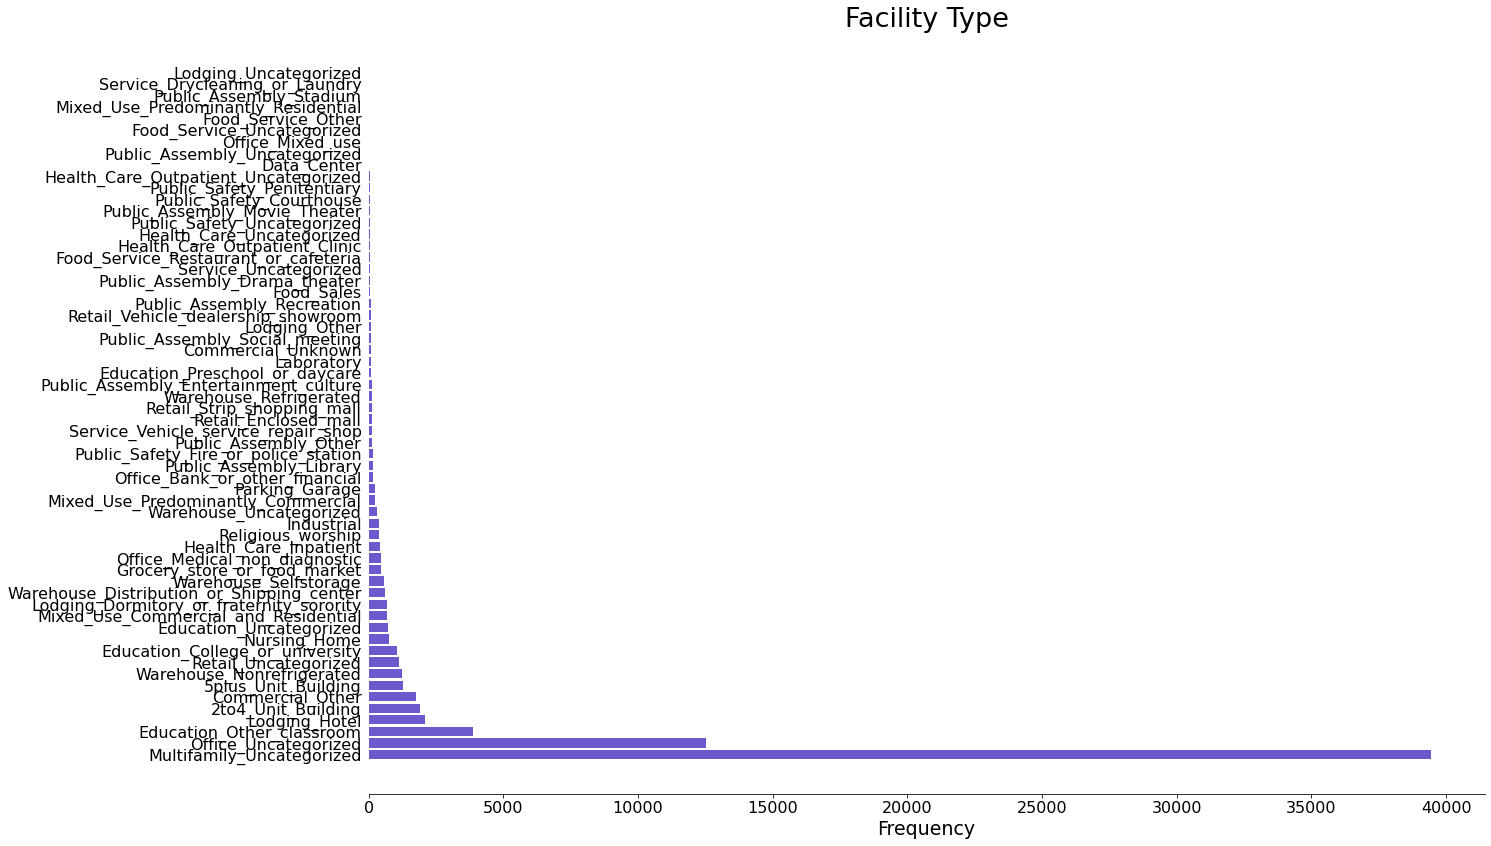

"\nfacility_type : It's an unbalanced variable, 'Multifamily_Uncategorized' & 'Office_Uncategorized' occupies almost 68% of the whole variable.\n"

In [16]:
facility_type_freq = pd.DataFrame(categorical_data.facility_type.value_counts(dropna=False))
facility_type_freq.reset_index(inplace=True)
facility_type_freq.rename(columns= {'index' : 'facility_type' , 'facility_type' : 'Frequency'} , inplace=True)
display(facility_type_freq)
plt.figure(figsize=(20,14))
plt.barh(facility_type_freq.facility_type, facility_type_freq.Frequency, color='slateblue')
plt.title('Facility Type', fontsize=27)
plt.xlabel('Frequency', fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(left=False)
sns.despine(left=True)
plt.show()

'''
facility_type : It's an unbalanced variable, 'Multifamily_Uncategorized' & 'Office_Uncategorized' occupies almost 68% of the whole variable.
'''

'\nhere years are annonymized in the given data\nYear_Factor ~ site_eui : Buildings constructed in the year of 2,5 & 6 consumes less energy comparing to the ones constructed in rest of the years.\nYear 5 & 6 constructed buildings are the most reliable ones as it consumes the least amount of energy. \n'

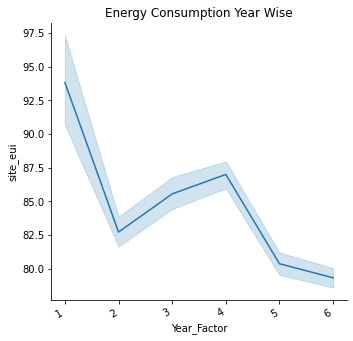

In [17]:
g = sns.relplot(x='Year_Factor', y='site_eui', kind="line", data=train_data).set(title = "Energy Consumption Year Wise")
g.figure.autofmt_xdate()
'''
here years are annonymized in the given data
Year_Factor ~ site_eui : Buildings constructed in the year of 2,5 & 6 consumes less energy comparing to the ones constructed in rest of the years.
Year 5 & 6 constructed buildings are the most reliable ones as it consumes the least amount of energy. 
'''

<Figure size 1008x504 with 0 Axes>

<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

'\nState_Factor ~ site_eui\nIf we compare the distribution of State_6 and this plot, in total State_6 is using the reasonable amount of energy as there are 50840 instances of State_6.\nState_4 has the less occurencies comparing to that of State_6 still it consumes more energy.\n'

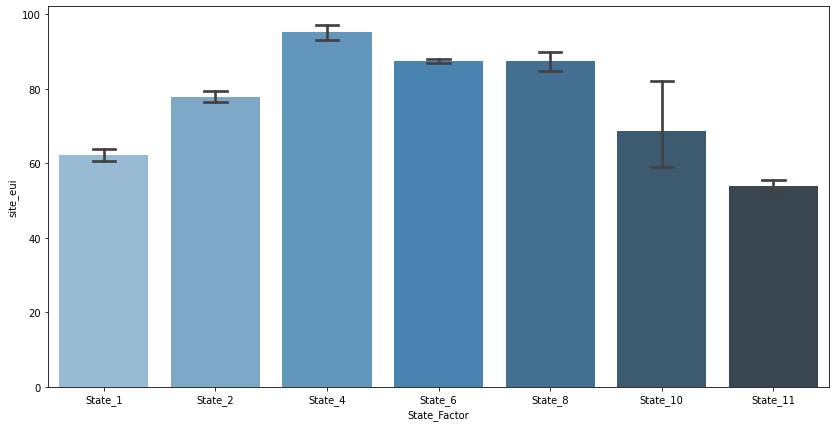

In [18]:
# set the background style of the plot
# sns.set_style('darkgrid')
plt.figure(figsize = (14,7))
sns.barplot(x ='State_Factor', y ='site_eui', capsize=.2, data = train_data, palette ='Blues_d')
'''
State_Factor ~ site_eui
If we compare the distribution of State_6 and this plot, in total State_6 is using the reasonable amount of energy as there are 50840 instances of State_6.
State_4 has the less occurencies comparing to that of State_6 still it consumes more energy.
'''

<AxesSubplot:xlabel='building_class', ylabel='site_eui'>

'\nAs expected with the situation of real world, Commercial buildings are using more energy \nthan that of Residencial ones. But the difference is not that large.\n'

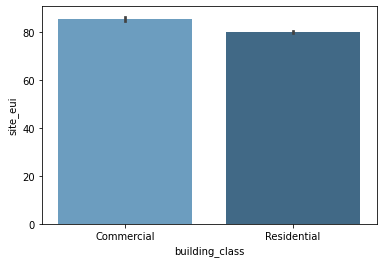

In [19]:
sns.barplot(x ='building_class', y ='site_eui', data = train_data, palette ='Blues_d')
'''
As expected with the situation of real world, Commercial buildings are using more energy 
than that of Residencial ones. But the difference is not that large.
'''

<Figure size 1008x504 with 0 Axes>

<AxesSubplot:xlabel='facility_type', ylabel='site_eui'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, 'Grocery_store_or_food_market'),
  Text(1, 0, 'Warehouse_Distribution_or_Shipping_center'),
  Text(2, 0, 'Retail_Enclosed_mall'),
  Text(3, 0, 'Education_Other_classroom'),
  Text(4, 0, 'Warehouse_Nonrefrigerated'),
  Text(5, 0, 'Warehouse_Selfstorage'),
  Text(6, 0, 'Office_Uncategorized'),
  Text(7, 0, 'Data_Center'),
  Text(8, 0, 'Commercial_Other'),
  Text(9, 0, 'Mixed_Use_Predominantly_Commercial'),
  Text(10, 0, 'Office_Medical_non_diagnostic'),
  Text(11, 0, 'Education_College_or_university'),
  Text(12, 0, 'Industrial'),
  Text(13, 0, 'Laboratory'),
  Text(14, 0, 'Public_Assembly_Entertainment_culture'),
  Text(15, 0, 'Retail_Vehicle_dealership_showroom'),
  Text(16, 0, 'Retail_Uncategorized'),
 

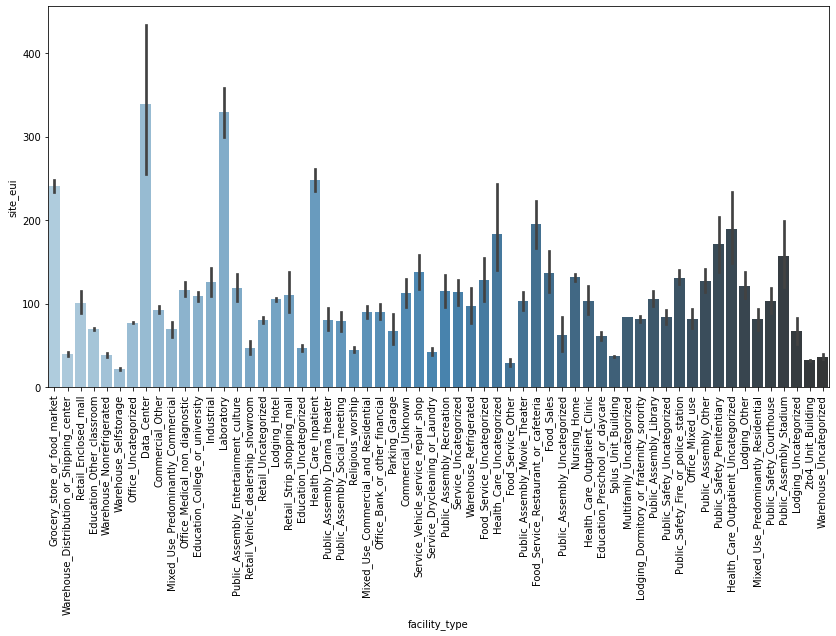

In [20]:
plt.figure(figsize = (14,7))
# plot the graph using the default estimator mean
sns.barplot(x ='facility_type', y ='site_eui', data = train_data, palette ='Blues_d')
plt.xticks(rotation=90)
# g.figure.autofmt_xdate()

In [21]:
# # sns.relplot(x='Year_Factor', y='site_eui', kind="line", data=train_data)
# cols = ['january_avg_temp' , 'february_avg_temp', 'march_avg_temp','april_avg_temp','may_avg_temp','june_avg_temp','july_avg_temp','august_avg_temp','september_avg_temp','october_avg_temp','november_avg_temp','december_avg_temp']
# plt.figure(figsize=(15, 80))
# for i, col in enumerate(cols):
#     # Plot distribution 
#     plt.subplot(32,2,i+1); 
# #     sns.distplot(train_data[col], color='blue')
#     sns.scatterplot(x=col, y='site_eui',hue = 'building_class', data=train_data)
#     plt.title(f'{col} ~ site_eui')
# # Show the plot
# plt.tight_layout()
# plt.show()

In [22]:
# # sns.relplot(x='Year_Factor', y='site_eui', kind="line", data=train_data)
# cols = ['january_min_temp' , 'february_min_temp', 'march_min_temp','april_min_temp','may_min_temp','june_min_temp','july_min_temp','august_min_temp','september_min_temp','october_min_temp','november_min_temp','december_min_temp']
# plt.figure(figsize=(15, 80))
# for i, col in enumerate(cols):
#     # Plot distribution 
#     plt.subplot(32,2,i+1); 
# #     sns.distplot(train_data[col], color='blue')
#     sns.lineplot(x=col, y='site_eui', data=train_data)
#     plt.title(f'{col} ~ site_eui')
# # Show the plot
# plt.tight_layout()
# plt.show()

In [23]:
# cols = ['january_max_temp' , 'february_max_temp', 'march_max_temp','april_max_temp','may_max_temp','june_max_temp','july_max_temp','august_max_temp','september_max_temp','october_max_temp','november_max_temp','december_max_temp']
# plt.figure(figsize=(15, 80))
# for i, col in enumerate(cols):
#     # Plot distribution 
#     plt.subplot(32,2,i+1);
#     sns.scatterplot(x=col, y='site_eui', data=train_data)
#     plt.title(f'{col} ~ site_eui')
# # Show the plot
# plt.tight_layout()
# plt.show()

<Figure size 1080x5760 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='days_below_0F', ylabel='site_eui'>

Text(0.5, 1.0, 'days_below_0F ~ site_eui')

<AxesSubplot:>

<AxesSubplot:xlabel='days_below_10F', ylabel='site_eui'>

Text(0.5, 1.0, 'days_below_10F ~ site_eui')

<AxesSubplot:>

<AxesSubplot:xlabel='days_below_20F', ylabel='site_eui'>

Text(0.5, 1.0, 'days_below_20F ~ site_eui')

<AxesSubplot:>

<AxesSubplot:xlabel='days_below_30F', ylabel='site_eui'>

Text(0.5, 1.0, 'days_below_30F ~ site_eui')

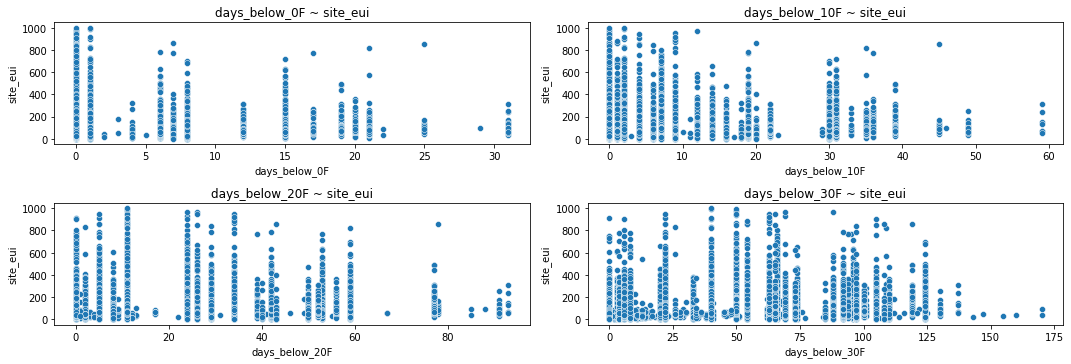

'\nas we go from below_0F -> below_30F the energy consumption is increasing.\n'

In [24]:
cols = ['days_below_0F','days_below_10F','days_below_20F','days_below_30F']
plt.figure(figsize=(15, 80))
for i, col in enumerate(cols):
    # Plot distribution 
    plt.subplot(32,2,i+1);
    sns.scatterplot(x=col, y='site_eui', data=train_data)
    plt.title(f'{col} ~ site_eui')
# Show the plot
plt.tight_layout()
plt.show()
'''
as we go from below_0F -> below_30F the energy consumption is increasing.
'''

<Figure size 1080x5760 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='days_above_80F', ylabel='site_eui'>

Text(0.5, 1.0, 'days_above_80F ~ site_eui')

<AxesSubplot:>

<AxesSubplot:xlabel='days_above_90F', ylabel='site_eui'>

Text(0.5, 1.0, 'days_above_90F ~ site_eui')

<AxesSubplot:>

<AxesSubplot:xlabel='days_above_100F', ylabel='site_eui'>

Text(0.5, 1.0, 'days_above_100F ~ site_eui')

<AxesSubplot:>

<AxesSubplot:xlabel='days_above_110F', ylabel='site_eui'>

Text(0.5, 1.0, 'days_above_110F ~ site_eui')

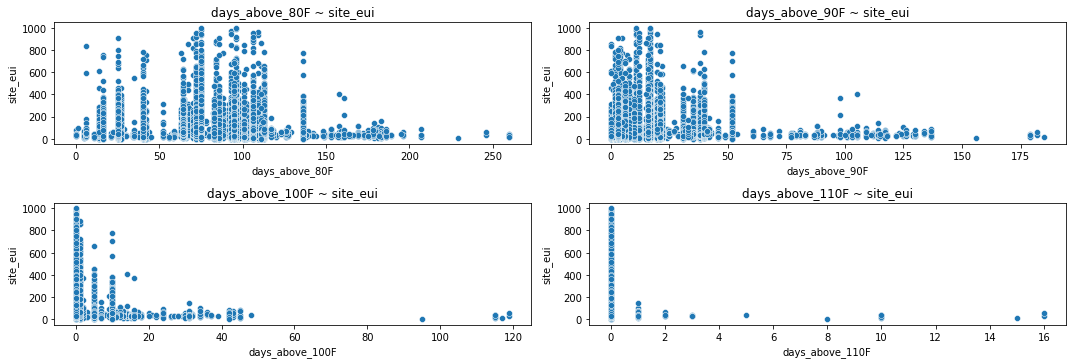

'\nWith high temperature, the number of instances if getting decrease as well as the use of the energy\nconsumption.\n'

In [25]:
cols = ['days_above_80F','days_above_90F','days_above_100F','days_above_110F']
plt.figure(figsize=(15, 80))
for i, col in enumerate(cols):
    # Plot distribution 
    plt.subplot(32,2,i+1);
    sns.scatterplot(x=col, y='site_eui', data=train_data)
    plt.title(f'{col} ~ site_eui')
# Show the plot
plt.tight_layout()
plt.show()
'''
With high temperature, the number of instances if getting decrease as well as the use of the energy
consumption.
'''

<AxesSubplot:xlabel='energy_star_rating', ylabel='site_eui'>

'\nsite_eui and energy_star_rating are inversely proposnal\nCommercial buildings are consuming slighly more energy than residential ones.\n'

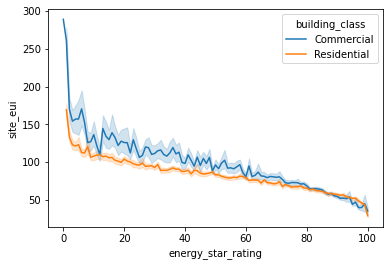

In [26]:
sns.lineplot(x='energy_star_rating', y='site_eui' , hue='building_class', data=train_data)
'''
site_eui and energy_star_rating are inversely proposnal
Commercial buildings are consuming slighly more energy than residential ones.
'''

In [27]:
# corr plot
corr = train_data.corr()

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

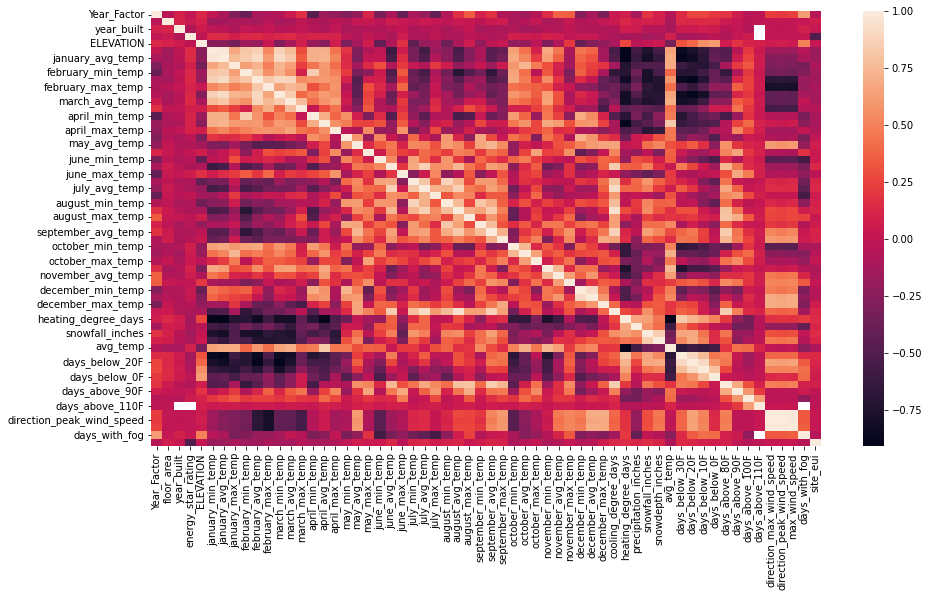

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(corr)

In [29]:
train_data.shape

(75757, 63)

In [30]:
# List of features having minimal correlation
columns_with_low_correlation = corr[(corr.site_eui >-0.03) & (corr.site_eui<0.03)].columns.tolist()
len(columns_with_low_correlation)

60

## <b>Handling missing Values</b>
* First remove the variable having more than 50% of the missing values
* Handle missing values of rest of the variables (i.e.,year_built, energy_star_rating)

In [31]:
import copy
newData = copy.deepcopy(train_data)
newData = newData.drop(['direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog' , 'precipitation_inches','snowfall_inches','snowdepth_inches'] , axis = 1)
newData.shape

(75757, 56)

In [32]:
# test data
# newTestData = copy.deepcopy(test_data)
# newTestData = newTestData.drop(['id','direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog' , 'precipitation_inches','snowfall_inches','snowdepth_inches'] , axis = 1)
# newTestData.shape

In [33]:
newData['year_built'].describe()
print("Instances having missing values : " , newData['year_built'].isnull().sum() , " which makes " , (newData['year_built'].isnull().sum()/newData.shape[0])*100 ,"% missing values in year_built")
newData['energy_star_rating'].describe()
print("Instances having missing values : " , newData['energy_star_rating'].isnull().sum() , " which makes " , (newData['energy_star_rating'].isnull().sum()/newData.shape[0])*100 ,"% missing values in energy_star_rating")

count    73920.000000
mean      1952.306764
std         37.053619
min          0.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
max       2015.000000
Name: year_built, dtype: float64

Instances having missing values :  1837  which makes  2.42485842892406 % missing values in year_built


count    49048.000000
mean        61.048605
std         28.663683
min          0.000000
25%         40.000000
50%         67.000000
75%         85.000000
max        100.000000
Name: energy_star_rating, dtype: float64

Instances having missing values :  26709  which makes  35.2561479467244 % missing values in energy_star_rating


In [34]:
newData.shape
print("There are total", (newData['year_built'] == 0).sum() , "entry having 0 as it's entry")
newData = newData[newData['year_built'] != 0]
newData.shape

(75757, 56)

There are total 6 entry having 0 as it's entry


(75751, 56)

In [35]:
# newTestData.shape
# print("There are total", (newTestData['year_built'] == 0).sum() , "entry having 0 as it's entry")
# # newTestData = newTestData[newTestData['year_built']]
# newTestData.shape

In [36]:
newData['year_built'].describe()
newData['year_built'].mode()
print("Total entries having mode as it's entry are",(newData['year_built'] == 1927).sum())
print("Total entries at 50% distribution are",(newData['year_built'] == 1951).sum())
#replacing null values with mode
newData['year_built'] = newData['year_built'].fillna(1927.0)
print("Is there any missing values now ?",bool(newData['year_built'].isna().sum()))

count    73914.000000
mean      1952.465243
std         32.613687
min       1600.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
max       2015.000000
Name: year_built, dtype: float64

0    1927.0
dtype: float64

Total entries having mode as it's entry are 2064
Total entries at 50% distribution are 653
Is there any missing values now ? False


In [37]:
# test data
#replacing null values with mode
# newTestData['year_built'] = newTestData['year_built'].fillna(1927.0)
# print("Is there any missing values now ?",bool(newTestData['year_built'].isna().sum()))

In [38]:
print("Variance of the energy_star_rating is",newData['energy_star_rating'].var())

Variance of the energy_star_rating is 821.6957087603367


In [39]:
# test data
# print("Variance of the energy_star_rating is",newTestData['energy_star_rating'].var())

<p>Here the <b>variance</b> of the this variable is <b>comparatively high</b>, which means that <b>model might be very sensitive to this data</b>.
In the ideal condition, the model should be stable
and on the other hand, <b>missing value should not be higher than 25-30%.</b> energy_star_rating has ~35% of the missing values,so let's <b>remove</b> this variable from the dataset</p>

In [40]:
newData = newData.drop(['energy_star_rating'] , axis = 1)
newData.shape
newData.isna().sum()

(75751, 55)

Year_Factor            0
State_Factor           0
building_class         0
facility_type          0
floor_area             0
year_built             0
ELEVATION              0
january_min_temp       0
january_avg_temp       0
january_max_temp       0
february_min_temp      0
february_avg_temp      0
february_max_temp      0
march_min_temp         0
march_avg_temp         0
march_max_temp         0
april_min_temp         0
april_avg_temp         0
april_max_temp         0
may_min_temp           0
may_avg_temp           0
may_max_temp           0
june_min_temp          0
june_avg_temp          0
june_max_temp          0
july_min_temp          0
july_avg_temp          0
july_max_temp          0
august_min_temp        0
august_avg_temp        0
august_max_temp        0
september_min_temp     0
september_avg_temp     0
september_max_temp     0
october_min_temp       0
october_avg_temp       0
october_max_temp       0
november_min_temp      0
november_avg_temp      0
november_max_temp      0


In [41]:
# test data
# newTestData = newTestData.drop(['energy_star_rating'] , axis = 1)
# newTestData.shape
# newTestData.isna().sum()

## Encoding the categorical variables

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [43]:
newData['new_state_factor'] = labelencoder.fit_transform(newData['State_Factor'])
newData['new_building_class'] = labelencoder.fit_transform(newData['building_class'])
newData['new_facility_type'] = labelencoder.fit_transform(newData['facility_type'])
newData.head()
newData.tail()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,new_state_factor,new_building_class,new_facility_type
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,56.972603,0,0,0,0,14,0,0,0,248.682615,0,0,13
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,56.972603,0,0,0,0,14,0,0,0,26.500150,0,0,55
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,56.972603,0,0,0,0,14,0,0,0,24.693619,0,0,48
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,56.972603,0,0,0,0,14,0,0,0,48.406926,0,0,6
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,56.972603,0,0,0,0,14,0,0,0,3.899395,0,0,56


,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,new_state_factor,new_building_class,new_facility_type
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,55.147541,6,0,0,0,25,3,0,0,132.918411,2,0,32
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,36.6,28,43.451613,56,34,47.672414,64,35,49.354839,71,40,56.266667,89,45,59.193548,88,47,63.566667,91,54,66.951613,87,52,68.612903,91,44,61.383333,79,39,55.403226,68,40,51.283333,71,24,38.532258,51,260,3772,55.147541,6,0,0,0,25,3,0,0,39.483672,2,1,1
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,47.911202,26,2,0,0,6,0,0,0,48.404398,2,0,2
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,36.6,26,36.612903,48,30,41.637931,58,29,41.338710,62,34,50.183333,79,40,52.145161,79,41,56.233333,86,48,58.758065,81,48,61.612903,87,41,53.783333,73,37,47.661290,59,34,44.650000,62,15,30.338710,46,55,6218,47.911202,26,2,0,0,6,0,0,0,592.022750,2,0,2
75756,6,State_11,Residential,2to4_Unit_Building,23888.0,1974.0,36.6,27,36.935484,51,29,42.172414,60,30,41.403226,66,36,51.533333,85,41,53.887097,80,41,58.433333,90,48,60.532258,83,49,64.338710,90,43,55.931034,75,40,48.532258,60,31,45.150000,69,18,30.919355,42,148,5853,49.127397,17,1,0,0,16,0,0,0,29.154684,2,1,0


In [44]:
# le = LabelEncoder()
# newTestData['new_state_factor'] = labelencoder.fit_transform(newTestData.State_Factor)
# newTestData['new_building_class'] = labelencoder.fit_transform(newTestData['building_class'])
# newTestData['new_facility_type'] = labelencoder.fit_transform(newTestData['facility_type'])
# newTestData.head()
# newTestData.tail()
# newTestData.State_Factor

In [45]:
newData.drop(['State_Factor','building_class','facility_type'],axis = 1,inplace = True)

In [46]:
# test data
# newTestData.drop(['State_Factor','building_class','facility_type'],axis = 1,inplace = True)

In [47]:
#to further pre process the empty values
from sklearn.impute import SimpleImputer
simpleimputer = SimpleImputer(missing_values=np.nan, strategy='mean')
simpleimputer.fit_transform(newData)

array([[1.00000e+00, 6.12420e+04, 1.94200e+03, ..., 0.00000e+00,
        0.00000e+00, 1.30000e+01],
       [1.00000e+00, 2.74000e+05, 1.95500e+03, ..., 0.00000e+00,
        0.00000e+00, 5.50000e+01],
       [1.00000e+00, 2.80025e+05, 1.95100e+03, ..., 0.00000e+00,
        0.00000e+00, 4.80000e+01],
       ...,
       [6.00000e+00, 2.80720e+04, 1.91700e+03, ..., 2.00000e+00,
        0.00000e+00, 2.00000e+00],
       [6.00000e+00, 5.35750e+04, 2.01200e+03, ..., 2.00000e+00,
        0.00000e+00, 2.00000e+00],
       [6.00000e+00, 2.38880e+04, 1.97400e+03, ..., 2.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [48]:
#to further pre process the empty values
# from sklearn.impute import SimpleImputer
# simpleimputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# simpleimputer.fit_transform(newTestData)

## Building A Models

In [49]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
'''
For tree based regressors, we do not need to scale the data
It's unnecessary since the base learners are trees, and any monotonic function 
of any feature variable will have no effect on how the trees are formed.
'''

"\nFor tree based regressors, we do not need to scale the data\nIt's unnecessary since the base learners are trees, and any monotonic function \nof any feature variable will have no effect on how the trees are formed.\n"

In [50]:
model_xgb = xgb.XGBRFRegressor()

In [51]:
y = newData['site_eui']
newData.drop(['site_eui'],inplace = True,axis = 1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.25, random_state=42)

In [53]:
model_xgb.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [54]:
y_pred_xgb = model_xgb.predict(X_test)

In [55]:
rmse = np.sqrt(MSE(y_test, y_pred_xgb))
print("RMSE (XGBRFRegressor): % f" %(rmse))

RMSE (XGBRFRegressor):  51.471012


In [56]:
# y_pred = model.predict(newTestData)

In [57]:
# finalSubmission = pd.read_csv("../input/widsdatathon2022/sample_solution.csv")
# finalSubmission["site_eui"] = y_pred
# finalSubmission.to_csv("submission.csv", index = False)

In [58]:
model_rf = RandomForestRegressor(n_jobs=-1)

RandomForestRegressor(n_estimators=10, n_jobs=-1)

RandomForestRegressor(n_estimators=10, n_jobs=-1)

RandomForestRegressor(n_estimators=20, n_jobs=-1)

RandomForestRegressor(n_estimators=20, n_jobs=-1)

RandomForestRegressor(n_estimators=30, n_jobs=-1)

RandomForestRegressor(n_estimators=30, n_jobs=-1)

RandomForestRegressor(n_estimators=40, n_jobs=-1)

RandomForestRegressor(n_estimators=40, n_jobs=-1)

RandomForestRegressor(n_estimators=50, n_jobs=-1)

RandomForestRegressor(n_estimators=50, n_jobs=-1)

RandomForestRegressor(n_estimators=60, n_jobs=-1)

RandomForestRegressor(n_estimators=60, n_jobs=-1)

RandomForestRegressor(n_estimators=70, n_jobs=-1)

RandomForestRegressor(n_estimators=70, n_jobs=-1)

RandomForestRegressor(n_estimators=80, n_jobs=-1)

RandomForestRegressor(n_estimators=80, n_jobs=-1)

RandomForestRegressor(n_estimators=90, n_jobs=-1)

RandomForestRegressor(n_estimators=90, n_jobs=-1)

Text(0.5, 1.0, 'Effect of n_estimators')

Text(0.5, 0, 'n_estimator')

Text(0, 0.5, 'score')

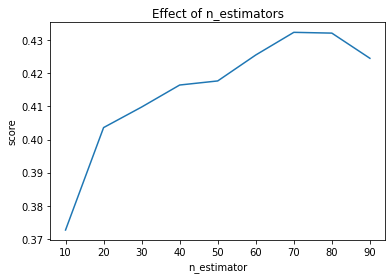

In [59]:
# Try different numbers of n_estimators
estimators = np.arange(10, 100, 10)
scores = []
for n in estimators:
    model_rf.set_params(n_estimators=n)
    model_rf.fit(X_train, y_train)
    scores.append(model_rf.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [60]:
model_rf = RandomForestRegressor(n_jobs=-1,n_estimators=90)

In [61]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=90, n_jobs=-1)

In [62]:
y_pred_rf = model_rf.predict(X_test)

In [63]:
rmse = np.sqrt(MSE(y_test, y_pred_rf))
print("RMSE(Random Forest Regressor) : % f" %(rmse))

RMSE(Random Forest Regressor) :  44.557669


In [64]:
# catboost regressor
model_catboost = CatBoostRegressor(learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.5)

In [65]:
model_catboost.fit(X_train,y_train)

0:	learn: 57.0848888	total: 111ms	remaining: 55.3s
1:	learn: 56.1766735	total: 152ms	remaining: 37.9s
2:	learn: 55.3957926	total: 195ms	remaining: 32.3s
3:	learn: 54.7592476	total: 239ms	remaining: 29.6s
4:	learn: 54.1510555	total: 280ms	remaining: 27.8s
5:	learn: 53.5959167	total: 324ms	remaining: 26.6s
6:	learn: 53.1466701	total: 364ms	remaining: 25.7s
7:	learn: 52.7672696	total: 405ms	remaining: 24.9s
8:	learn: 52.5017101	total: 446ms	remaining: 24.4s
9:	learn: 52.1574632	total: 488ms	remaining: 23.9s
10:	learn: 51.9143753	total: 531ms	remaining: 23.6s
11:	learn: 51.6515319	total: 573ms	remaining: 23.3s
12:	learn: 51.4226576	total: 614ms	remaining: 23s
13:	learn: 51.2418724	total: 656ms	remaining: 22.8s
14:	learn: 51.0479125	total: 697ms	remaining: 22.5s
15:	learn: 50.9184722	total: 739ms	remaining: 22.4s
16:	learn: 50.7429842	total: 781ms	remaining: 22.2s
17:	learn: 50.6511224	total: 821ms	remaining: 22s
18:	learn: 50.5098065	total: 863ms	remaining: 21.8s
19:	learn: 50.3879814	tota

In [66]:
y_pred_catboost = model_catboost.predict(X_test)

In [67]:
rmse = np.sqrt(MSE(y_test, y_pred_catboost))
print("RMSE(Catboost Regressor) : % f" %(rmse))

RMSE :  47.227734
